# **Success After Graduation**
## *Analyzing employment and satisfaction outcomes of Ontario’s private career college graduates* 
*By: Mohammed Abdulaziz (ID: 100917802)*

Private career colleges (PCCs) play an important role in Ontario's postsecondary education system. They offer diploma and certificate programs that teach students practical skills to join the workforce. As an alternative to publicly funded universities and colleges, PCCs focus on shorter, job-oriented vocational training in fields such as healthcare, human resources, technology, truck driving, business, etc. However, the effectiveness of these colleges needs examination. We should analyze the impact of PCCs on their graduates’ career success and financial stability. To that end, I selected the Private Career Colleges (PCC) key performance indicators - 2022 dataset from the Government of Ontario Open Data Portal. This dataset includes metrics such as graduation rates, graduate employment rates within their field of study, and graduate satisfaction levels. I will aim to study the relationships between these factors to identify meaningful insights. For instance, I will examine whether higher employment rates are linked to greater satisfaction. I also want to explore whether the program type studied affects graduates’ satisfaction levels or their employment rates.

## Data Collection

The dataset was obtained from the Government of Ontario Open Data Portal, a free online resource providing public datasets from the Ontario government.

In [301]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [302]:
# Load Data
pcc = pd.read_csv('pcc_data.csv')
pcc.head()

,COLLEGE ID,COLLEGE NAME,CAMPUS ID,CAMPUS,CITY/TOWN,POSTAL CODE,PROGRAM NAME,PROGRAM TYPE,PROGRAM CATEGORY,AUDIT,GRADUATION RATE\n(%),GRADUATE EMPLOYMENT RATE\n(%),GRADUATE EMPLOYMENT RATE IN THE FIELD OF STUDY\n(%),GRADUATE SATISFACTION RATE\n(% Satisfied),EMPLOYER SATISFACTION RATE\n(% Satisfied),OSAP DEFAULT RATE\n(%)
0,PROVINCE-WIDE,ALL CAREER COLLEGES COMBINED,+,All Campuses Combined,NaN,NaN,NaN,NaN,NaN,NaN,75.20%,80.40%,62.60%,79.80%,93.50%,NaN
1,200002,ROBAR CENTRE FOR TRANSPORT TRAINING INC.,+,+,NaN,NaN,+,NaN,NaN,Y,95.50%,77.10%,60.00%,94.30%,100.00%,NaN
2,200002,ROBAR CENTRE FOR TRANSPORT TRAINING INC.,101148,"ROBAR CENTRE FOR TRANSPORT TRAINING, HANNON",HANNON,L0R 1P0,+,NaN,NaN,Y,95.50%,77.10%,60.00%,94.30%,100.00%,NaN
3,200002,ROBAR CENTRE FOR TRANSPORT TRAINING INC.,101148,"ROBAR CENTRE FOR TRANSPORT TRAINING, HANNON",HANNON,L0R 1P0,HEAVY EQUIPMENT OPERATOR,Construction Trade,Heavy Equipment Operator,Y,95.50%,77.10%,60.00%,94.30%,100.00%,NaN
4,200024,ADVANCED FINANCIAL SOLUTIONS INC.,+,+,NaN,NaN,+,NaN,NaN,Y,97.80%,50.00%,33.30%,81.30%,NaN,NaN


## Data Cleaning

Columns irrelevant for my analysis and rows with missing values were removed from the dataset. Moreover, awkwardly named columns were renamed.

In [303]:
# Drop irrelevant columns for analysis
pcc = pcc.drop(['COLLEGE ID','CAMPUS ID','CAMPUS','CITY/TOWN','POSTAL CODE',
                'PROGRAM CATEGORY','AUDIT', 'GRADUATE EMPLOYMENT RATE\n(%)',
                'EMPLOYER SATISFACTION RATE\n(% Satisfied)', 'OSAP DEFAULT RATE\n(%)'], axis=1)

In [304]:
# Drop all rows which contain any missing data
pcc = pcc.dropna(axis=0)
# Rename columns
pcc.columns = ['COLLEGE','PROGRAM','PROGRAM TYPE','GRADUATION','EMPLOYMENT','SATISFACTION']
# Remove '%' symbol from numeric data
columns_to_clean = ['GRADUATION', 'EMPLOYMENT', 'SATISFACTION']          
for column in columns_to_clean:
    pcc[column] = pcc[column].str.rstrip('%') 
    pcc[column] = pd.to_numeric(pcc[column])
display(pcc)

,COLLEGE,PROGRAM,PROGRAM TYPE,GRADUATION,EMPLOYMENT,SATISFACTION
3,ROBAR CENTRE FOR TRANSPORT TRAINING INC.,HEAVY EQUIPMENT OPERATOR,Construction Trade,95.5,60.0,94.3
6,ADVANCED FINANCIAL SOLUTIONS INC.,ADVANCED MEDICAL LASER TECHNICIAN ONLINE,Human Services,94.7,18.2,64.3
7,ADVANCED FINANCIAL SOLUTIONS INC.,ADVANCED MEDICAL LASER TECHNICIAN,Human Services,100.0,42.1,94.4
21,1327913 ONTARIO INC.,MEDICAL OFFICE AISTANT,Health Services,100.0,100.0,33.3
22,1327913 ONTARIO INC.,PERSONAL SUPPORT WORKER,Health Services,82.3,92.5,95.1
...,...,...,...,...,...,...
3554,B-TOWN TRUCK DRIVING SCHOOL INC.,CLA A 103.5-HOUR MELT PROGRAM,Tractor-Trailer / Driver Licensing,98.5,66.1,91.8
3557,2691713 ONTARIO INC.,AZ TRACTOR-TRAILER (MELT),Tractor-Trailer / Driver Licensing,100.0,84.0,100.0
3559,SUPREME TRUCK DRIVING & FORKLIFT SCHOOL INC.,AZ TRACTOR-TRAILER (MELT),Tractor-Trailer / Driver Licensing,100.0,56.3,100.0
3562,2768440 ONTARIO INC.,COMMERCIAL TRUCK DRIVER TRAINING - MELT,Tractor-Trailer / Driver Licensing,100.0,66.7,100.0


## Analyses
I will explore the effect of the program type studied on graduation rates, graduate employment rates and satisfaction levels with exploratory analyses, consisting of statistical summaries and visualizations to identify trends in the outcomes of PCC graduates.

### Distribution

I will begin by exploring the frequency distribution of the different program types offered by PCCs in Ontario using a count plot. 


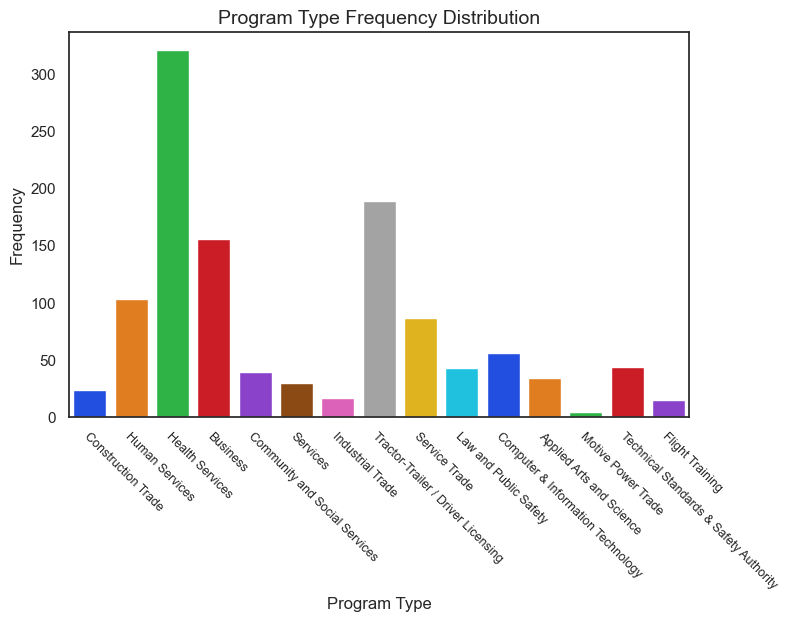

In [305]:
# Count plot of Program Type
plt.subplots(figsize=(8,5))
# Set theme and create the count plot
sns.set_theme(style= 'darkgrid')
pcc_count = sns.countplot(x = 'PROGRAM TYPE', data = pcc, palette='bright')
# Label the title, x-axis, and y-axis of the plot
pcc_count.set_title('Program Type Frequency Distribution', fontsize=14)
pcc_count.set_xlabel('Program Type', fontsize=12)
pcc_count.set_ylabel('Frequency', fontsize=12)
# Customize the x-axis ticks orientation and alignment
plt.xticks(rotation=-45, ha='left', rotation_mode='anchor', fontsize=9)
plt.show()

This figure shows that the majority of students at PCCs enrolled in health services programs, while motive power trade was the least pursued program category.

### Program Type and Graduation Rate
Let's examine the effect of the program type studied at PCCs on the graduation rate of their students.


In [306]:
# Average graduation rate of students in each program type, rounded to 2 decimal places, sorted by value
pcc_grouped = pcc.groupby('PROGRAM TYPE')[['GRADUATION']].mean().round(2).sort_values(by='GRADUATION')
display(pcc_grouped)
# Descriptive statistics of graduation rates
pcc_summary = pcc_grouped['GRADUATION'].describe()
print("Graduation Rate Summary:\n")
print(f"Min graduation rate: {round(pcc_summary['min'], 2)}")
print(f"Mean graduation rate: {round(pcc_summary['mean'], 2)}")
print(f"Max graduation rate: {round(pcc_summary['max'], 2)}")

,GRADUATION
PROGRAM TYPE,
Flight Training,51.11
Community and Social Services,64.75
Applied Arts and Science,65.53
Law and Public Safety,68.60
Services,69.30
Health Services,71.28
Human Services,72.80
Business,80.37
Computer & Information Technology,80.97


Graduation Rate Summary:

Min graduation rate: 51.11
Mean graduation rate: 76.85
Max graduation rate: 97.12


A descriptive analysis of graduation rates reveals that students enrolled in Technical Standards and Safety Authority (TSSA) had the highest graduation rates with almost everyone graduating, while those in the flight training programs were the least likely to graduate. The overall average graduation rate for PCC graduates was about 77%.

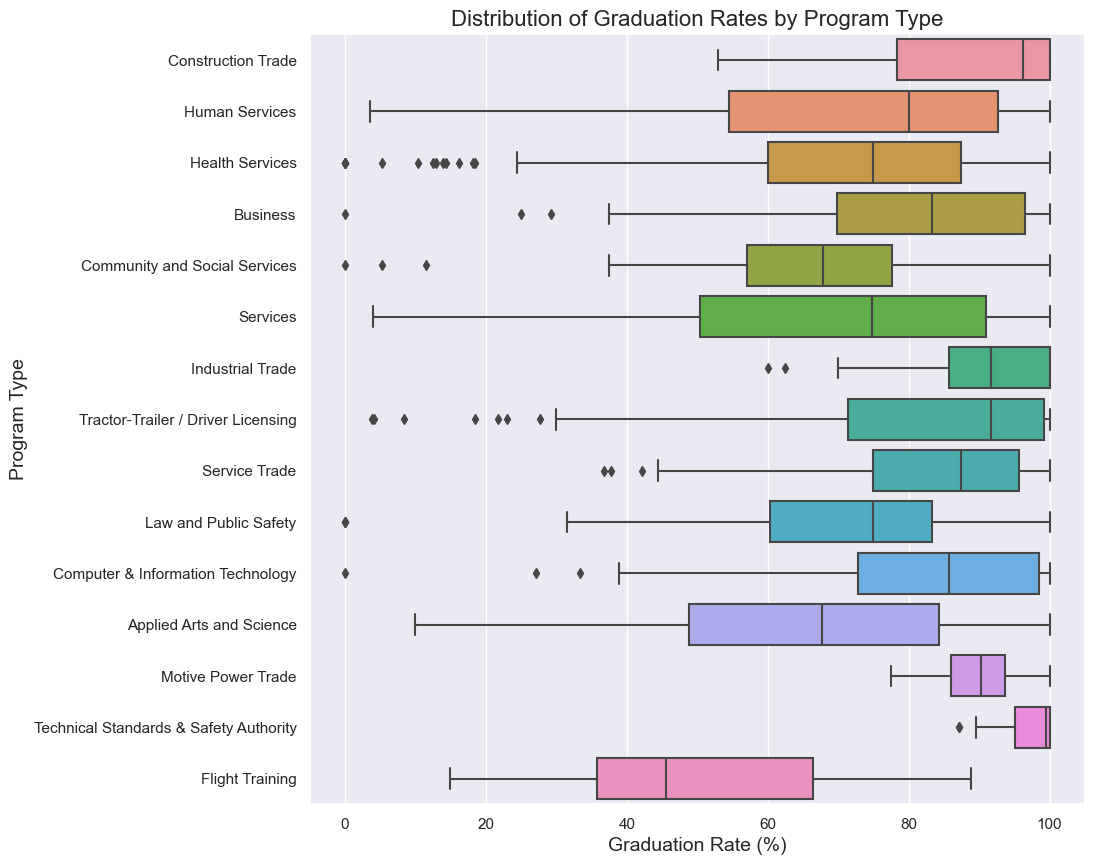

In [307]:
# Create the box plot
plt.figure(figsize=(10, 10))
sns.boxplot(data=pcc, y='PROGRAM TYPE', x='GRADUATION')
# Label the title, x-axis, and y-axis of the plot
plt.ylabel('Program Type',fontsize=14)
plt.xlabel('Graduation Rate (%)', fontsize=14)
plt.title('Distribution of Graduation Rates by Program Type', fontsize=16)
plt.xticks(rotation=0)  
plt.show()

This box plot helps us visualize the graduation rates distribution of each program type offered by PCCs in Ontario. It illustrates that the graduation rates of students enrolled in the services and human services program types have high variability, while the graduation rates of students in the TSSA program types have the least variability.

### Program Type and Employment Rate
Let's take a closer look between the type of program studied at PCCs and the employment rate of graduates in their field of study through summary statistics.

In [308]:
# Average employment rate of students in their field of study, rounded to 2 decimal places
pcc_e_grouped = pcc.groupby('PROGRAM TYPE')[['EMPLOYMENT']].mean().round(2)
display(pcc_e_grouped)
# Descriptive statistics of employment rates in field of study
pcc_e_summary = pcc_e_grouped['EMPLOYMENT'].describe()
print("Employment Rates in Field of Study Summary:\n")
print(f"Min employment rate: {round(pcc_e_summary['min'], 2)}")
print(f"Mean employment rate: {round(pcc_e_summary['mean'], 2)}")
print(f"Max employment rate: {round(pcc_e_summary['max'], 2)}")


,EMPLOYMENT
PROGRAM TYPE,
Applied Arts and Science,49.97
Business,47.20
Community and Social Services,54.98
Computer & Information Technology,40.67
Construction Trade,51.32
Flight Training,71.23
Health Services,64.45
Human Services,62.47
Industrial Trade,75.91


Employment Rates in Field of Study Summary:

Min employment rate: 40.67
Mean employment rate: 60.06
Max employment rate: 78.08


A descriptive analysis of employment rates reveals that the minimum employment rate related to their field of study for PCC graduates was around 41% and the highest was about 78%. The overall average employment rate in field of study for PCC graduates was about 60%.

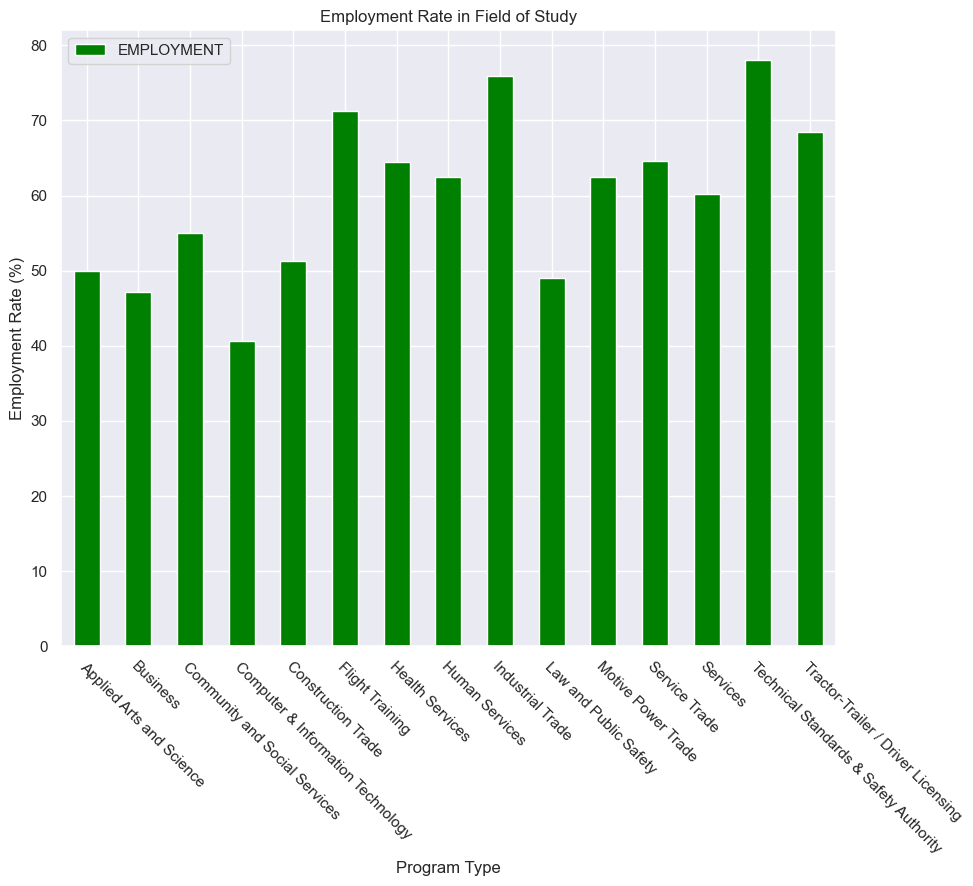

In [309]:
# Create grouped panda for plotting
pcc_e_grouped = pcc.groupby(['PROGRAM TYPE'])[['EMPLOYMENT']].mean()
# Matplotlib Bar plot
pcc_barplot = pcc_e_grouped.plot.bar(figsize=(10,8), color = "green")
# Label the title, x-axis, and y-axis of the plot
plt.title("Employment Rate in Field of Study")
plt.ylabel("Employment Rate (%)")
plt.xlabel('Program Type')
# Customize the x-axis ticks orientation and alignment
plt.xticks(rotation=-45, ha='left', rotation_mode='anchor')
plt.show()
 

This bar plot helps us visualize the employment rates of PCC graduates in their field of study. It suggests that students enrolled in TSSA program category also had the highest employment rates in their field, while those in computer and information technology program categories had the lowest likelihood of finding employment in their field. 

### Program Type and Satisfaction Rate
Let's explore the relationship between the program type studied at PCCs and the average satisfaction rate of their graduates using summary statistics.

In [310]:
# Average satisfaction level for each program type, rounded to 2 decimal places
pcc_s_grouped = pcc.groupby('PROGRAM TYPE')[['SATISFACTION']].mean().round(2)
display(pcc_s_grouped)
# Descriptive statistics of employment rates in field of study
pcc_s_summary = pcc_s_grouped['SATISFACTION'].describe()
print("Satisfaction Rates Summary:\n")
print(f"Min satisfaction rate: {round(pcc_s_summary['min'], 2)}")
print(f"Mean satisfaction rate: {round(pcc_s_summary['mean'], 2)}")
print(f"Max satisfaction rate: {round(pcc_s_summary['max'], 2)}")

,SATISFACTION
PROGRAM TYPE,
Applied Arts and Science,68.06
Business,68.46
Community and Social Services,71.24
Computer & Information Technology,62.46
Construction Trade,73.56
Flight Training,89.42
Health Services,78.82
Human Services,78.06
Industrial Trade,89.85


Satisfaction Rates Summary:

Min satisfaction rate: 62.46
Mean satisfaction rate: 75.08
Max satisfaction rate: 89.85


A descriptive analysis of satisfaction rates of PCC graduate indicates that the minimum satisfaction rate of PCC graduates was around 62%, while the highest satisfaction rate achieved was about 90%. The overall average satisfaction rate of PCC graduates was around 75%.

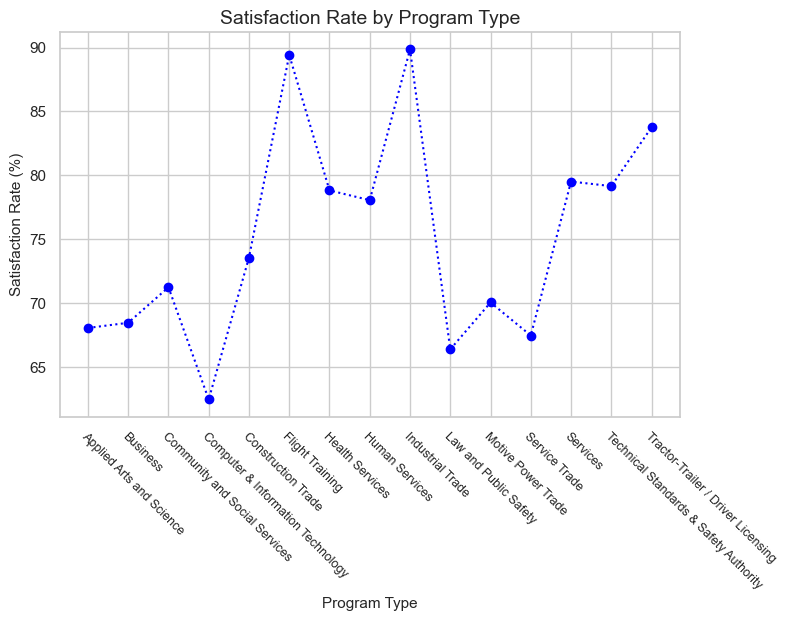

In [311]:
# Grouping data for line plot
pcc_sr_grouped = pcc.groupby('PROGRAM TYPE')['SATISFACTION'].mean()
x = pcc_sr_grouped.index
y = pcc_sr_grouped.values
# Set theme and create the plot
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8, 5))
plt.plot(x, y, linestyle='dotted', marker='o', color='blue')
# Label the title, x-axis, and y-axis of the plot
plt.title('Satisfaction Rate by Program Type', fontsize=14)
plt.xlabel('Program Type', fontsize=11)
plt.ylabel('Satisfaction Rate (%)', fontsize=11)
# Customize the x-axis ticks orientation and alignment
plt.xticks(rotation=-45, ha='left', rotation_mode='anchor', fontsize=9)
plt.show()

This line plot helps us visualize the satisfaction rates of PCC graduates. It demonstrates that students who completed industrial trade programs were the most satisfied in their career, while those who pursued computer and information technology programs were the least satisfied with their career choice. 

### Employment Rate and Satisfaction Rate
Let's analyze the relationship between employment rate of PCC graduates in their field of study and their satisfaction with their program type choice.

In [312]:
# Average employment and satisfaction rates for each program type, rounded to 2 decimal places, sorted by employment rate
pcc_es_grouped = pcc.groupby('PROGRAM TYPE')[['EMPLOYMENT','SATISFACTION']].mean().round(2).sort_values(by='EMPLOYMENT')
display(pcc_es_grouped)

,EMPLOYMENT,SATISFACTION
PROGRAM TYPE,,
Computer & Information Technology,40.67,62.46
Business,47.20,68.46
Law and Public Safety,48.97,66.38
Applied Arts and Science,49.97,68.06
Construction Trade,51.32,73.56
Community and Social Services,54.98,71.24
Services,60.15,79.51
Human Services,62.47,78.06
Motive Power Trade,62.50,70.05


This table reveals an interesting pattern. When closely examining the interaction between employment and satisfaction rates of PCC graduates, program types with higher employment rates generally tend to have higher satisfaction rates. 

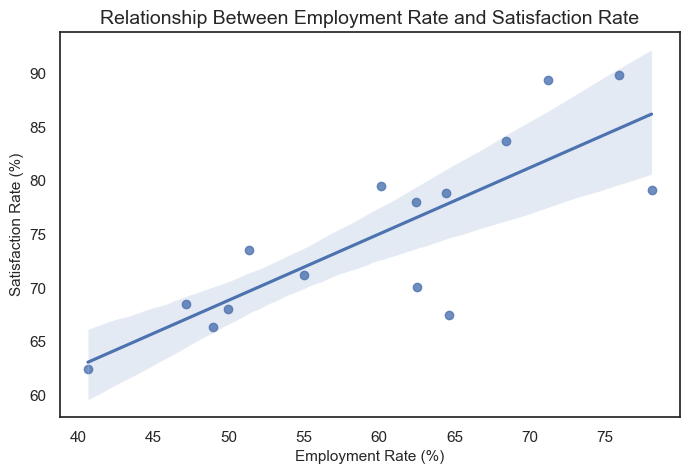

In [316]:
# Grouping data for regression plot
pcc_es_grouped = pcc.groupby('PROGRAM TYPE')[['EMPLOYMENT','SATISFACTION']].mean()
# Set theme and create the plot
sns.set_theme(style='white')
plt.figure(figsize=(8, 5))
sns.regplot(data = pcc_es_grouped, x='EMPLOYMENT', y='SATISFACTION')
# Label the title, x-axis, and y-axis of the plot
plt.title('Relationship Between Employment Rate and Satisfaction Rate', fontsize=14)
plt.xlabel('Employment Rate (%)', fontsize=11)
plt.ylabel('Satisfaction Rate (%)', fontsize=11)
plt.show()

The regression plot's line of best fit indicates a generally positive correlation between the employment rate of PCC graduates and their satisfaction rates. As expected, this suggests that overall graduates who achieve higher employment rates in their field of study will report greater satisfaction with their choice of program type.

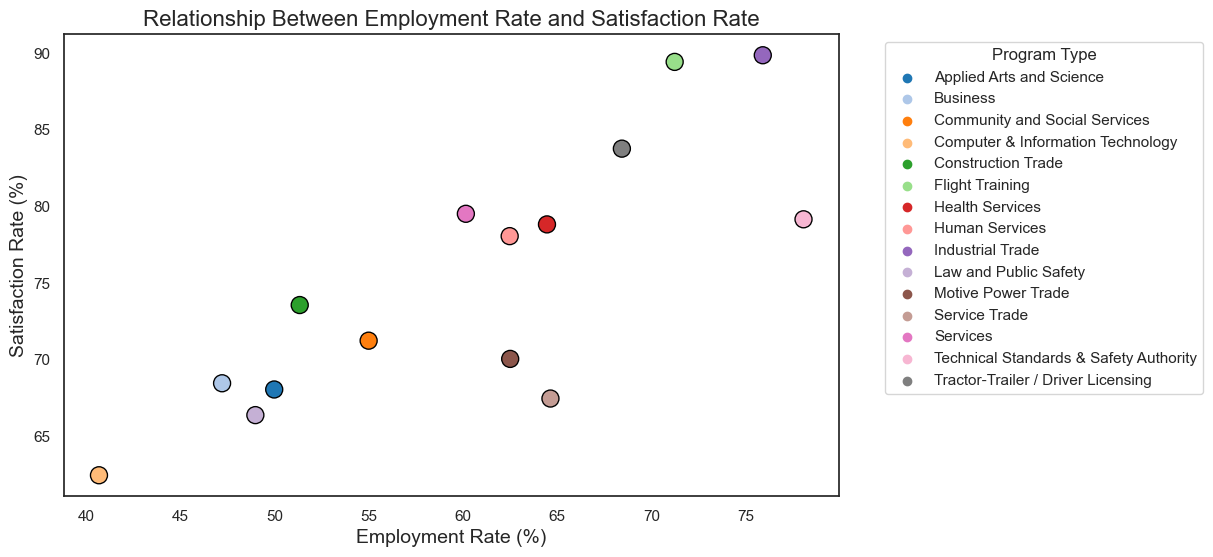

In [317]:
# Grouping data for scatter plot
pcc_es_grouped = pcc.groupby('PROGRAM TYPE')[['EMPLOYMENT','SATISFACTION']].mean()
# Set theme and create the plot
sns.set_theme(style='white')
plt.figure(figsize=(10, 6))
sns.scatterplot(data = pcc_es_grouped, x='EMPLOYMENT', y='SATISFACTION', palette='tab20', hue='PROGRAM TYPE', s=150, edgecolor='black')
# Label the title, x-axis, and y-axis of the plot
plt.title('Relationship Between Employment Rate and Satisfaction Rate', fontsize=16)
plt.xlabel('Employment Rate (%)', fontsize=14)
plt.ylabel('Satisfaction Rate (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Program Type')
plt.show()

This scatter plot visualizes the relationship between the employment rate and satisfaction rate of PCC graduates categorized by the program type they studied. The industrial trade has the second highest employment rate (75.91%) along with the highest satisfaction rate (89.85%). On the other hand, computer and information technology records the lowest employment rate (40.67%) as well as the lowest satisfaction rate (62.46%).

## Discussion
In this assignment, I explored data from private career colleges (PCCs) in Ontario and focused on relationships between program types, graduation rates, employment outcomes, and graduate satisfaction rates. An exploratory analysis revealed that graduates' satisfaction rates were tied to their ability to find employment within their field of study. I found that, generally, PCC students who pursued program types with higher employment rates in their field of study reported greater satisfaction with their career choice, and vice versa. This finding suggests that graduates' satisfaction with their program choice may be closely linked to how effectively the program helps them secure employment in their field. However, program type demand did not appear to affect employment or satisfaction rates. It was noted that health services was the most popular program type, while motive power trade had the lowest enrollment. Despite this, the average employment and satisfaction rates for these program types did not show significant differences. The data analysis also indicated that employment and satisfaction rates of PCC graduates were influenced by the program type pursued. Program types like TSSA and industrial trades had both high employment rates and high satisfaction rates. In contrast, computer and information technology programs had the lowest graduation and employment rates among all program types. These outcomes highlight the importance of aligning educational programs with labor market demands to ensure graduates feel satisfied and prepared for their careers. Programs with weaker outcomes may benefit from targeted improvements to better support students’ transitions into the workforce.

## References
1. Source data – https://open.canada.ca/data/en/dataset/1d2f74c5-7bf7-453f-8622-111a71d875f2/resource/47a38c89-3ba0-48a3-9531-6d65a814976f
2. Markdown formatting syntax – https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax
3. Private Career Colleges – https://www.auditor.on.ca/en/content/annualreports/arreports/en11/312en11.pdf
4. Further data cleaning – https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
5. Further manipulation of count plot – https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.axisartist.axis_artist.TickLabels.html
6. Further manipulation of scatter plot –  https://matplotlib.org/stable/api/legend_api.html#matplotlib.legend.Legend.get_bbox_to_anchor
7. Further manipulation of scatter plot –  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter
8. Pandas for data manipulation
9. Matplotlib for data visualization
10. Seaborn for data visualization